In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models as models
from torch.utils.data import DataLoader

import random
import os
import copy

import torch

import sys
sys.path.append("../../")

from src.model.TransferModel import run_style_transfer
from src.dataset.dataset import ImgDataset
from src.utils.other import *

# load stuff

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
imsize = 512 if torch.cuda.is_available() else 128  # use small size if no gpu

In [3]:
league_dataset = ImgDataset("../../data/", imsize, device)

In [4]:
# https://pytorch.org/tutorials/advanced/neural_style_tutorial.html
cnn = models.vgg19(pretrained=True).features.to(device).eval()

cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)

# desired depth layers to compute style/content losses :
content_layers_default = ['conv_4']
style_layers_default = ['conv_1', 'conv_2', 'conv_3', 'conv_4', 'conv_5']

In [5]:
outfolder = "../../results/league_content_league_style_images_256/"
os.system("mkdir -p " + str(outfolder))

0

# Doing Random League Images for Content and Style

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 11.360942 Content Loss: 6.482088

run [100]:
Style Loss : 3.886256 Content Loss: 4.980536

run [150]:
Style Loss : 1.838979 Content Loss: 4.256363

run [200]:
Style Loss : 1.246063 Content Loss: 3.837040

run [250]:
Style Loss : 0.935257 Content Loss: 3.632470

run [300]:
Style Loss : 0.748952 Content Loss: 3.516343



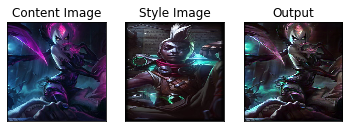

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 16.441757 Content Loss: 7.379523

run [100]:
Style Loss : 2.894381 Content Loss: 5.696953

run [150]:
Style Loss : 1.291496 Content Loss: 4.502557

run [200]:
Style Loss : 0.939989 Content Loss: 3.959334

run [250]:
Style Loss : 0.755672 Content Loss: 3.689933

run [300]:
Style Loss : 0.650405 Content Loss: 3.528746



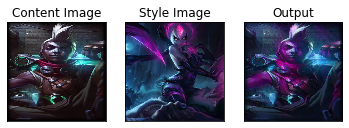

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 148.899902 Content Loss: 8.756157

run [100]:
Style Loss : 27.376522 Content Loss: 8.651288

run [150]:
Style Loss : 12.846114 Content Loss: 7.454682

run [200]:
Style Loss : 7.572388 Content Loss: 6.477072

run [250]:
Style Loss : 5.022196 Content Loss: 5.922850

run [300]:
Style Loss : 3.612050 Content Loss: 5.490750



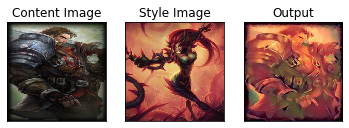

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 75.829826 Content Loss: 8.133335

run [100]:
Style Loss : 32.810162 Content Loss: 7.130418

run [150]:
Style Loss : 21.130087 Content Loss: 5.903501

run [200]:
Style Loss : 14.729713 Content Loss: 5.217294

run [250]:
Style Loss : 11.198626 Content Loss: 4.795403

run [300]:
Style Loss : 8.211147 Content Loss: 4.613362



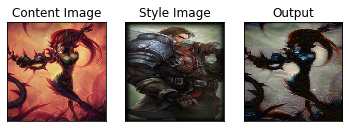

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 24.793037 Content Loss: 12.865154

run [100]:
Style Loss : 3.712882 Content Loss: 9.519341

run [150]:
Style Loss : 1.981894 Content Loss: 7.846217

run [200]:
Style Loss : 1.264002 Content Loss: 7.128371

run [250]:
Style Loss : 0.905483 Content Loss: 6.794033

run [300]:
Style Loss : 0.708280 Content Loss: 6.618156



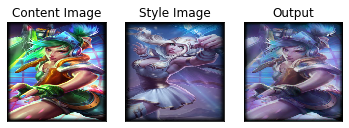

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 103.423286 Content Loss: 10.453777

run [100]:
Style Loss : 29.916258 Content Loss: 11.282557

run [150]:
Style Loss : 10.527369 Content Loss: 10.896931

run [200]:
Style Loss : 5.587210 Content Loss: 10.152715

run [250]:
Style Loss : 3.554094 Content Loss: 9.374501

run [300]:
Style Loss : 2.509508 Content Loss: 8.876708



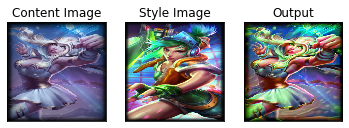

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 54.413261 Content Loss: 10.827278

run [100]:
Style Loss : 6.827281 Content Loss: 7.329350

run [150]:
Style Loss : 2.998527 Content Loss: 5.178200

run [200]:
Style Loss : 1.826261 Content Loss: 4.290897

run [250]:
Style Loss : 1.119124 Content Loss: 3.843027

run [300]:
Style Loss : 0.772624 Content Loss: 3.586025



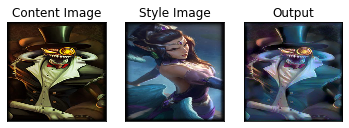

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 47.846375 Content Loss: 7.462887

run [100]:
Style Loss : 21.540695 Content Loss: 6.945776

run [150]:
Style Loss : 15.236032 Content Loss: 6.884291

run [200]:
Style Loss : 6.935047 Content Loss: 6.347631

run [250]:
Style Loss : 4.561017 Content Loss: 5.594383

run [300]:
Style Loss : 3.386601 Content Loss: 4.857780



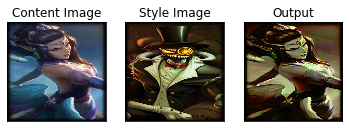

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 143.967468 Content Loss: 10.178007

run [100]:
Style Loss : 20.782833 Content Loss: 10.527779

run [150]:
Style Loss : 8.442423 Content Loss: 9.158459

run [200]:
Style Loss : 5.550246 Content Loss: 7.930510

run [250]:
Style Loss : 4.235838 Content Loss: 7.015095

run [300]:
Style Loss : 3.261413 Content Loss: 6.475431



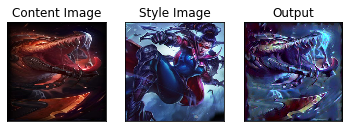

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 77.092003 Content Loss: 11.305157

run [100]:
Style Loss : 35.266220 Content Loss: 10.223038

run [150]:
Style Loss : 17.907677 Content Loss: 9.399725

run [200]:
Style Loss : 12.520953 Content Loss: 7.726699

run [250]:
Style Loss : 9.313039 Content Loss: 6.807940

run [300]:
Style Loss : 6.948566 Content Loss: 6.270959



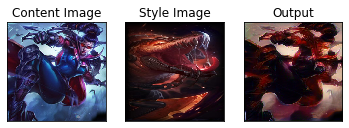

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 116.455238 Content Loss: 17.344807

run [100]:
Style Loss : 48.066322 Content Loss: 17.951065

run [150]:
Style Loss : 23.094568 Content Loss: 17.132999

run [200]:
Style Loss : 10.823174 Content Loss: 14.895955

run [250]:
Style Loss : 6.596814 Content Loss: 12.894901

run [300]:
Style Loss : 4.190831 Content Loss: 11.608442



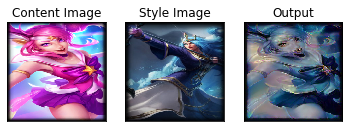

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 462.668152 Content Loss: 15.950788

run [100]:
Style Loss : 89.287125 Content Loss: 18.769896

run [150]:
Style Loss : 44.729855 Content Loss: 18.520937

run [200]:
Style Loss : 32.634605 Content Loss: 17.754139

run [250]:
Style Loss : 35.553017 Content Loss: 17.989990

run [300]:
Style Loss : 16.894712 Content Loss: 17.103424



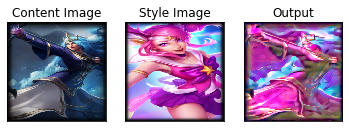

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 45.174110 Content Loss: 7.390789

run [100]:
Style Loss : 22.616096 Content Loss: 6.425618

run [150]:
Style Loss : 12.779772 Content Loss: 5.672690

run [200]:
Style Loss : 9.097946 Content Loss: 4.375646

run [250]:
Style Loss : 6.290593 Content Loss: 3.733305

run [300]:
Style Loss : 4.227530 Content Loss: 3.385548



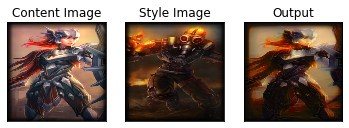

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 36.889103 Content Loss: 5.296453

run [100]:
Style Loss : 10.818704 Content Loss: 5.522946

run [150]:
Style Loss : 5.360176 Content Loss: 4.417441

run [200]:
Style Loss : 3.401003 Content Loss: 3.600482

run [250]:
Style Loss : 2.333990 Content Loss: 3.211923

run [300]:
Style Loss : 1.580498 Content Loss: 3.003410



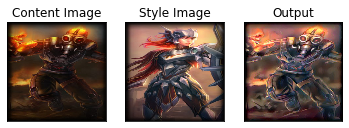

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 20.333370 Content Loss: 4.892977

run [100]:
Style Loss : 4.785984 Content Loss: 3.875621

run [150]:
Style Loss : 2.035297 Content Loss: 3.169755

run [200]:
Style Loss : 1.409294 Content Loss: 2.727503

run [250]:
Style Loss : 0.975925 Content Loss: 2.510292

run [300]:
Style Loss : 0.749941 Content Loss: 2.386642



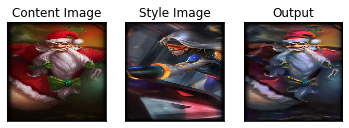

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 14.017161 Content Loss: 5.383972

run [100]:
Style Loss : 6.457434 Content Loss: 3.727657

run [150]:
Style Loss : 3.213591 Content Loss: 3.121757

run [200]:
Style Loss : 1.786115 Content Loss: 2.861802

run [250]:
Style Loss : 1.158232 Content Loss: 2.627721

run [300]:
Style Loss : 0.861535 Content Loss: 2.462482



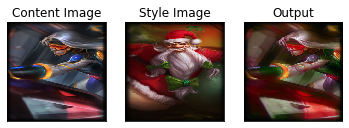

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 11.771571 Content Loss: 3.777602

run [100]:
Style Loss : 3.071741 Content Loss: 2.853232

run [150]:
Style Loss : 1.245780 Content Loss: 2.162609

run [200]:
Style Loss : 0.781021 Content Loss: 1.847952

run [250]:
Style Loss : 0.564541 Content Loss: 1.695669

run [300]:
Style Loss : 0.454229 Content Loss: 1.599264



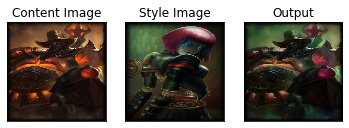

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 11.959864 Content Loss: 3.996931

run [100]:
Style Loss : 3.837179 Content Loss: 2.683491

run [150]:
Style Loss : 1.962749 Content Loss: 2.113484

run [200]:
Style Loss : 1.086511 Content Loss: 1.797183

run [250]:
Style Loss : 0.682709 Content Loss: 1.658578

run [300]:
Style Loss : 0.475424 Content Loss: 1.567028



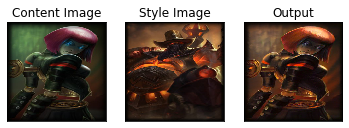

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 165.450729 Content Loss: 20.739050

run [100]:
Style Loss : 28.887812 Content Loss: 15.214437

run [150]:
Style Loss : 13.977399 Content Loss: 11.479689

run [200]:
Style Loss : 7.223825 Content Loss: 9.660532

run [250]:
Style Loss : 4.186140 Content Loss: 8.498765

run [300]:
Style Loss : 2.541139 Content Loss: 7.644864



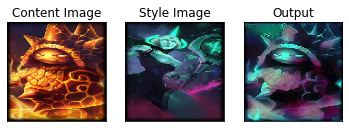

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 195.962433 Content Loss: 15.115607

run [100]:
Style Loss : 57.472469 Content Loss: 14.698637

run [150]:
Style Loss : 24.470057 Content Loss: 13.902885

run [200]:
Style Loss : 11.479632 Content Loss: 12.834906

run [250]:
Style Loss : 5.979381 Content Loss: 11.564864

run [300]:
Style Loss : 3.683331 Content Loss: 10.221039



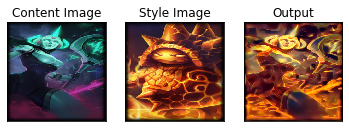

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 206.440125 Content Loss: 12.276296

run [100]:
Style Loss : 94.864273 Content Loss: 10.965508

run [150]:
Style Loss : 60.366688 Content Loss: 10.613037

run [200]:
Style Loss : 37.569141 Content Loss: 9.777119

run [250]:
Style Loss : 29.609545 Content Loss: 8.375495

run [300]:
Style Loss : 23.302011 Content Loss: 7.789436



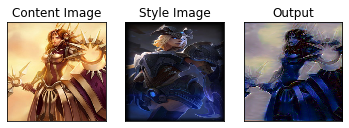

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 204.268051 Content Loss: 9.869196

run [100]:
Style Loss : 123.503708 Content Loss: 10.661730

run [150]:
Style Loss : 79.400887 Content Loss: 11.584398

run [200]:
Style Loss : 46.664593 Content Loss: 12.191998

run [250]:
Style Loss : 23.120905 Content Loss: 12.549481

run [300]:
Style Loss : 11.779704 Content Loss: 11.964170



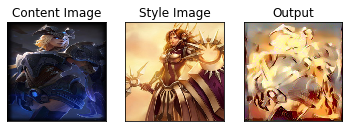

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 185.661102 Content Loss: 8.833923

run [100]:
Style Loss : 23.143543 Content Loss: 8.465172

run [150]:
Style Loss : 4.196538 Content Loss: 6.420947

run [200]:
Style Loss : 1.796120 Content Loss: 4.655427

run [250]:
Style Loss : 1.100785 Content Loss: 3.602303

run [300]:
Style Loss : 0.787469 Content Loss: 3.043696



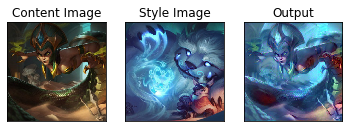

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 50.453468 Content Loss: 7.643254

run [100]:
Style Loss : 29.327721 Content Loss: 5.680986

run [150]:
Style Loss : 17.111397 Content Loss: 4.817944

run [200]:
Style Loss : 10.695549 Content Loss: 3.975104

run [250]:
Style Loss : 7.063353 Content Loss: 3.401021

run [300]:
Style Loss : 4.648956 Content Loss: 3.051078



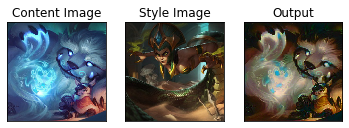

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 130.615051 Content Loss: 8.511248

run [100]:
Style Loss : 35.360928 Content Loss: 10.968248

run [150]:
Style Loss : 13.558854 Content Loss: 10.032343

run [200]:
Style Loss : 7.354687 Content Loss: 8.558115

run [250]:
Style Loss : 5.167416 Content Loss: 7.475089

run [300]:
Style Loss : 3.841716 Content Loss: 6.776200



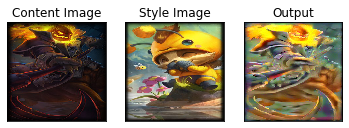

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 140.142258 Content Loss: 9.533146

run [100]:
Style Loss : 101.637718 Content Loss: 14.853514

run [150]:
Style Loss : 56.456425 Content Loss: 14.186278

run [200]:
Style Loss : 33.169918 Content Loss: 12.722230

run [250]:
Style Loss : 24.344200 Content Loss: 10.027920

run [300]:
Style Loss : 18.486380 Content Loss: 8.549962



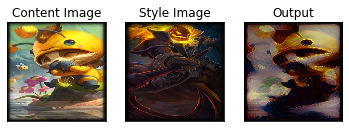

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 16.259794 Content Loss: 6.007692

run [100]:
Style Loss : 4.842933 Content Loss: 5.775344

run [150]:
Style Loss : 2.410095 Content Loss: 5.128831

run [200]:
Style Loss : 1.515536 Content Loss: 4.709359

run [250]:
Style Loss : 1.104013 Content Loss: 4.388115

run [300]:
Style Loss : 0.897171 Content Loss: 4.183992



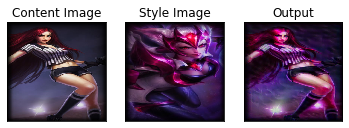

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 5.668269 Content Loss: 5.248121

run [100]:
Style Loss : 2.744903 Content Loss: 4.275461

run [150]:
Style Loss : 1.640188 Content Loss: 3.955270

run [200]:
Style Loss : 1.152713 Content Loss: 3.798548

run [250]:
Style Loss : 0.905287 Content Loss: 3.700625

run [300]:
Style Loss : 0.765084 Content Loss: 3.622692



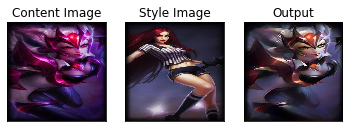

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 42.591770 Content Loss: 8.134357

run [100]:
Style Loss : 18.497908 Content Loss: 6.833997

run [150]:
Style Loss : 10.460402 Content Loss: 5.662226

run [200]:
Style Loss : 6.780439 Content Loss: 4.990661

run [250]:
Style Loss : 4.457911 Content Loss: 4.604465

run [300]:
Style Loss : 3.197139 Content Loss: 4.352392



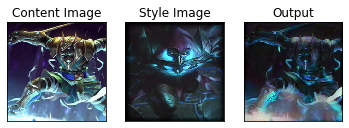

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 53.428188 Content Loss: 7.134552

run [100]:
Style Loss : 19.605984 Content Loss: 7.461549

run [150]:
Style Loss : 8.953323 Content Loss: 6.945630

run [200]:
Style Loss : 5.226050 Content Loss: 6.391458

run [250]:
Style Loss : 3.220093 Content Loss: 6.042699

run [300]:
Style Loss : 2.194580 Content Loss: 5.756191



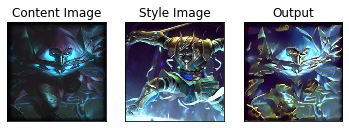

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 40.614136 Content Loss: 14.945232

run [100]:
Style Loss : 15.899941 Content Loss: 12.087080

run [150]:
Style Loss : 7.954490 Content Loss: 10.567068

run [200]:
Style Loss : 4.913784 Content Loss: 9.766494

run [250]:
Style Loss : 3.288754 Content Loss: 9.177887

run [300]:
Style Loss : 2.348087 Content Loss: 8.775542



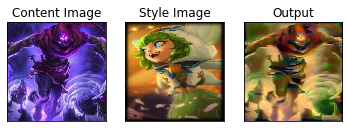

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 544.161621 Content Loss: 17.160332

run [100]:
Style Loss : 52.619457 Content Loss: 17.275265

run [150]:
Style Loss : 17.270687 Content Loss: 15.984990

run [200]:
Style Loss : 9.059438 Content Loss: 14.247458

run [250]:
Style Loss : 5.627391 Content Loss: 12.723501

run [300]:
Style Loss : 4.039216 Content Loss: 11.418627



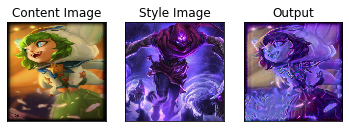

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 25.556423 Content Loss: 5.856552

run [100]:
Style Loss : 7.301415 Content Loss: 5.207619

run [150]:
Style Loss : 3.750877 Content Loss: 4.244341

run [200]:
Style Loss : 2.459860 Content Loss: 3.689819

run [250]:
Style Loss : 1.751570 Content Loss: 3.379210

run [300]:
Style Loss : 1.292926 Content Loss: 3.191195



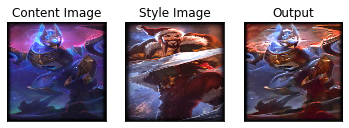

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 35.339619 Content Loss: 6.593016

run [100]:
Style Loss : 6.605133 Content Loss: 5.463690

run [150]:
Style Loss : 3.397451 Content Loss: 4.015164

run [200]:
Style Loss : 2.446575 Content Loss: 3.453759

run [250]:
Style Loss : 1.681246 Content Loss: 3.141312

run [300]:
Style Loss : 1.080846 Content Loss: 2.933553



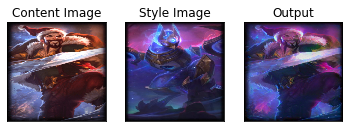

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 38.321320 Content Loss: 5.858471

run [100]:
Style Loss : 21.500698 Content Loss: 6.546950

run [150]:
Style Loss : 8.244548 Content Loss: 6.618962

run [200]:
Style Loss : 4.804212 Content Loss: 6.205157

run [250]:
Style Loss : 3.028430 Content Loss: 5.477710

run [300]:
Style Loss : 2.043723 Content Loss: 5.040969



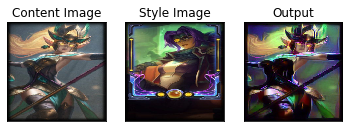

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 14.263026 Content Loss: 6.429110

run [100]:
Style Loss : 4.071371 Content Loss: 4.535938

run [150]:
Style Loss : 1.684321 Content Loss: 3.702375

run [200]:
Style Loss : 1.003577 Content Loss: 3.233778

run [250]:
Style Loss : 0.662696 Content Loss: 3.004354

run [300]:
Style Loss : 0.501168 Content Loss: 2.866558



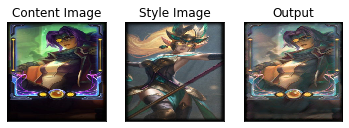

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 22.805607 Content Loss: 6.837831

run [100]:
Style Loss : 9.495179 Content Loss: 5.244020

run [150]:
Style Loss : 6.207563 Content Loss: 4.287725

run [200]:
Style Loss : 3.267884 Content Loss: 3.904608

run [250]:
Style Loss : 2.347083 Content Loss: 3.562615

run [300]:
Style Loss : 1.696384 Content Loss: 3.297676



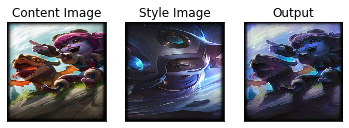

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 18.569304 Content Loss: 6.142552

run [100]:
Style Loss : 9.599509 Content Loss: 5.130394

run [150]:
Style Loss : 5.484649 Content Loss: 4.452880

run [200]:
Style Loss : 3.958214 Content Loss: 4.023393

run [250]:
Style Loss : 2.885420 Content Loss: 3.861920

run [300]:
Style Loss : 2.142514 Content Loss: 3.817852



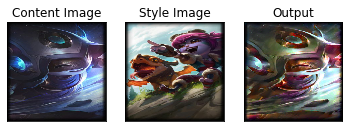

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 14.335135 Content Loss: 9.016858

run [100]:
Style Loss : 6.405532 Content Loss: 5.875368

run [150]:
Style Loss : 3.891864 Content Loss: 4.613836

run [200]:
Style Loss : 2.631335 Content Loss: 4.049226

run [250]:
Style Loss : 1.939606 Content Loss: 3.767068

run [300]:
Style Loss : 1.392957 Content Loss: 3.576148



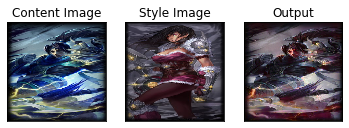

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 40.963367 Content Loss: 7.880587

run [100]:
Style Loss : 10.143515 Content Loss: 6.565196

run [150]:
Style Loss : 5.113820 Content Loss: 5.499056

run [200]:
Style Loss : 3.201203 Content Loss: 4.832310

run [250]:
Style Loss : 2.166242 Content Loss: 4.464490

run [300]:
Style Loss : 1.577322 Content Loss: 4.248743



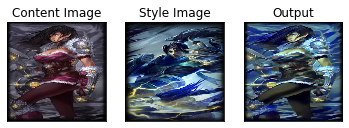

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 30.661308 Content Loss: 10.466331

run [100]:
Style Loss : 15.713662 Content Loss: 6.830654

run [150]:
Style Loss : 8.264026 Content Loss: 5.724768

run [200]:
Style Loss : 5.333786 Content Loss: 4.875443

run [250]:
Style Loss : 3.674368 Content Loss: 4.375814

run [300]:
Style Loss : 2.499855 Content Loss: 4.082864



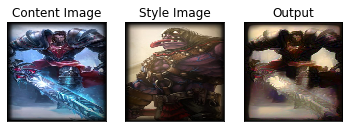

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 132.775772 Content Loss: 8.544037

run [100]:
Style Loss : 15.748743 Content Loss: 7.716807

run [150]:
Style Loss : 3.961276 Content Loss: 6.397686

run [200]:
Style Loss : 1.817423 Content Loss: 5.247109

run [250]:
Style Loss : 1.192870 Content Loss: 4.522898

run [300]:
Style Loss : 0.882320 Content Loss: 4.091877



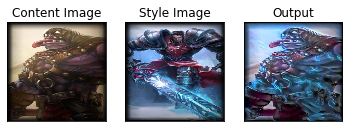

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 83.248680 Content Loss: 8.591877

run [100]:
Style Loss : 33.285431 Content Loss: 9.106844

run [150]:
Style Loss : 21.200254 Content Loss: 9.142378

run [200]:
Style Loss : 15.511439 Content Loss: 9.257847

run [250]:
Style Loss : 11.680204 Content Loss: 9.279024

run [300]:
Style Loss : 8.182916 Content Loss: 9.257910



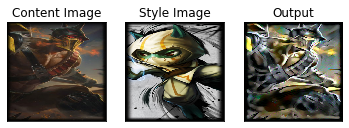

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 39.510895 Content Loss: 11.273912

run [100]:
Style Loss : 22.059189 Content Loss: 8.934130

run [150]:
Style Loss : 13.976246 Content Loss: 7.753658

run [200]:
Style Loss : 8.844028 Content Loss: 6.999221

run [250]:
Style Loss : 5.252226 Content Loss: 6.552533

run [300]:
Style Loss : 2.803005 Content Loss: 6.114926



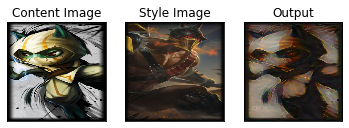

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 77.834229 Content Loss: 7.080711

run [100]:
Style Loss : 37.482582 Content Loss: 7.309533

run [150]:
Style Loss : 24.358719 Content Loss: 6.282496

run [200]:
Style Loss : 15.193437 Content Loss: 5.785921

run [250]:
Style Loss : 9.391612 Content Loss: 5.349983

run [300]:
Style Loss : 6.450631 Content Loss: 4.817595



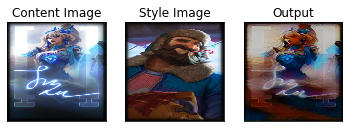

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 84.194122 Content Loss: 6.998798

run [100]:
Style Loss : 32.879890 Content Loss: 7.746478

run [150]:
Style Loss : 20.457777 Content Loss: 7.734774

run [200]:
Style Loss : 9.867499 Content Loss: 7.826723

run [250]:
Style Loss : 5.798885 Content Loss: 7.328663

run [300]:
Style Loss : 2.654518 Content Loss: 6.509623



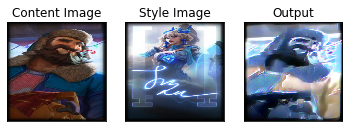

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 64.830124 Content Loss: 9.591036

run [100]:
Style Loss : 27.566221 Content Loss: 9.292957

run [150]:
Style Loss : 18.528196 Content Loss: 8.135931

run [200]:
Style Loss : 12.481076 Content Loss: 7.428196

run [250]:
Style Loss : 8.757126 Content Loss: 6.834167

run [300]:
Style Loss : 6.080838 Content Loss: 6.393425



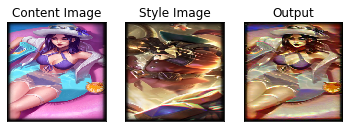

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 249.632339 Content Loss: 11.942909

run [100]:
Style Loss : 48.925678 Content Loss: 11.717305

run [150]:
Style Loss : 19.367821 Content Loss: 10.414932

run [200]:
Style Loss : 11.617734 Content Loss: 9.458043

run [250]:
Style Loss : 7.045806 Content Loss: 8.702531

run [300]:
Style Loss : 4.448081 Content Loss: 8.080031



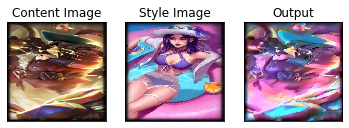

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 7.501512 Content Loss: 4.261600

run [100]:
Style Loss : 2.852993 Content Loss: 3.169242

run [150]:
Style Loss : 1.990284 Content Loss: 2.640051

run [200]:
Style Loss : 1.618717 Content Loss: 2.351985

run [250]:
Style Loss : 1.411493 Content Loss: 2.201042

run [300]:
Style Loss : 1.221788 Content Loss: 2.120691



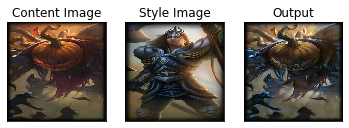

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 7.319500 Content Loss: 4.205177

run [100]:
Style Loss : 2.608269 Content Loss: 2.729958

run [150]:
Style Loss : 1.819787 Content Loss: 2.219477

run [200]:
Style Loss : 1.376971 Content Loss: 2.028016

run [250]:
Style Loss : 0.987838 Content Loss: 1.955575

run [300]:
Style Loss : 0.711404 Content Loss: 1.914060



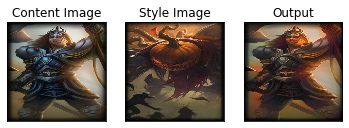

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 43.333797 Content Loss: 7.230005

run [100]:
Style Loss : 10.619442 Content Loss: 6.428923

run [150]:
Style Loss : 4.247390 Content Loss: 5.526460

run [200]:
Style Loss : 2.417944 Content Loss: 4.957548

run [250]:
Style Loss : 1.706806 Content Loss: 4.554552

run [300]:
Style Loss : 1.264253 Content Loss: 4.284109



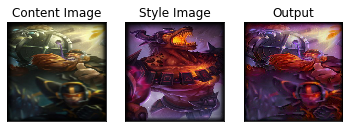

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 12.159884 Content Loss: 6.088342

run [100]:
Style Loss : 5.285711 Content Loss: 4.510456

run [150]:
Style Loss : 2.706934 Content Loss: 4.184876

run [200]:
Style Loss : 1.816716 Content Loss: 3.935675

run [250]:
Style Loss : 1.369423 Content Loss: 3.787396

run [300]:
Style Loss : 1.044717 Content Loss: 3.706602



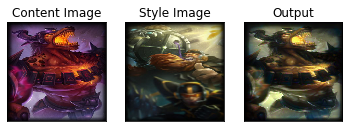

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 21.686230 Content Loss: 5.424582

run [100]:
Style Loss : 9.807500 Content Loss: 5.365212

run [150]:
Style Loss : 5.638981 Content Loss: 5.244317

run [200]:
Style Loss : 3.384873 Content Loss: 5.059278

run [250]:
Style Loss : 2.422348 Content Loss: 4.805146

run [300]:
Style Loss : 1.889855 Content Loss: 4.591339



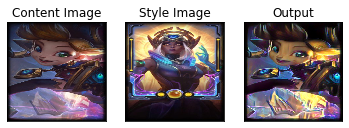

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 11.352309 Content Loss: 6.629427

run [100]:
Style Loss : 3.593836 Content Loss: 4.564608

run [150]:
Style Loss : 2.052318 Content Loss: 3.764418

run [200]:
Style Loss : 1.456627 Content Loss: 3.357793

run [250]:
Style Loss : 1.079012 Content Loss: 3.153566

run [300]:
Style Loss : 0.866163 Content Loss: 2.995592



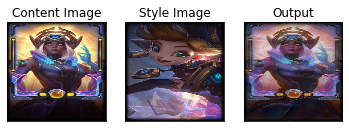

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 60.113621 Content Loss: 6.374377

run [100]:
Style Loss : 21.562145 Content Loss: 5.689240

run [150]:
Style Loss : 7.280688 Content Loss: 5.269204

run [200]:
Style Loss : 3.628860 Content Loss: 4.540565

run [250]:
Style Loss : 2.187452 Content Loss: 3.928754

run [300]:
Style Loss : 1.436634 Content Loss: 3.516229



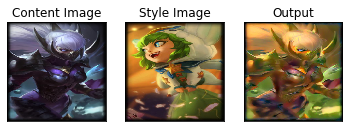

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 64.158112 Content Loss: 7.882255

run [100]:
Style Loss : 16.122919 Content Loss: 5.882603

run [150]:
Style Loss : 9.101869 Content Loss: 4.582516

run [200]:
Style Loss : 5.280511 Content Loss: 3.856906

run [250]:
Style Loss : 3.336462 Content Loss: 3.445028

run [300]:
Style Loss : 2.186816 Content Loss: 3.212985



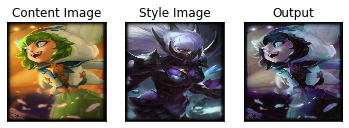

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 208.677994 Content Loss: 9.178089

run [100]:
Style Loss : 53.993000 Content Loss: 9.545774

run [150]:
Style Loss : 19.103582 Content Loss: 9.313686

run [200]:
Style Loss : 12.617960 Content Loss: 8.275703

run [250]:
Style Loss : 9.801843 Content Loss: 7.483854

run [300]:
Style Loss : 7.777190 Content Loss: 7.017067



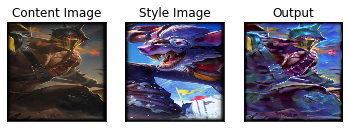

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 31.993786 Content Loss: 11.112335

run [100]:
Style Loss : 16.962414 Content Loss: 7.731717

run [150]:
Style Loss : 9.049014 Content Loss: 6.470909

run [200]:
Style Loss : 6.177001 Content Loss: 5.685860

run [250]:
Style Loss : 4.242947 Content Loss: 5.280396

run [300]:
Style Loss : 2.612623 Content Loss: 4.954900



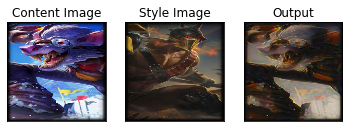

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 119.768646 Content Loss: 7.624533

run [100]:
Style Loss : 32.384747 Content Loss: 8.523013

run [150]:
Style Loss : 18.917347 Content Loss: 7.484806

run [200]:
Style Loss : 12.227115 Content Loss: 6.797139

run [250]:
Style Loss : 7.747091 Content Loss: 6.515950

run [300]:
Style Loss : 4.856954 Content Loss: 6.268888



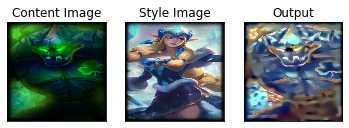

Building the style transfer model..
Optimizing..
run [50]:
Style Loss : 267.141663 Content Loss: 9.843582

run [100]:
Style Loss : 202.974182 Content Loss: 14.948176

run [150]:
Style Loss : 65.405937 Content Loss: 17.906387

run [200]:
Style Loss : 18.987667 Content Loss: 15.323363

run [250]:
Style Loss : 3.783528 Content Loss: 10.927155

run [300]:
Style Loss : 1.922997 Content Loss: 8.633963



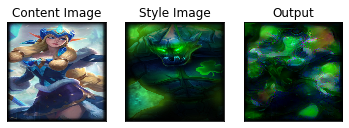

In [6]:
data_paths = os.listdir('../../data/')
data_paths.remove("traditional_style_images")

for i in range(0,30):
    
    content_index = random.randint(0, len(data_paths))
    style_index = random.randint(0, len(data_paths))
    
    
    content_img = league_dataset.load_image('../../data/' + data_paths[content_index], device)
    style_img = league_dataset.load_image('../../data/' + data_paths[style_index], device)

    # input
    input_img = content_img.clone()
    # run style transfer
    output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, style_img, input_img, num_steps=300,
                                do_print=True, device=device)
    
    fig, axes = plt.subplots(1, 3)
    for i in range(3):
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
    imshow(content_img, axes[0], "Content Image")
    imshow(style_img, axes[1], "Style Image")
    imshow(output, axes[2], "Output")
    plt.savefig(outfolder + data_paths[content_index].replace(".jpg","") + "_" + data_paths[style_index].replace(".jpg","") + ".jpg")
    plt.show()
    
    content_img = league_dataset.load_image('../../data/' + data_paths[style_index], device)
    style_img = league_dataset.load_image('../../data/' + data_paths[content_index], device)

    # input
    input_img = content_img.clone()
    # run style transfer
    output = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                                content_img, style_img, input_img, num_steps=300,
                                do_print=True, device=device)
    
    fig, axes = plt.subplots(1, 3)
    for i in range(3):
        axes[i].get_xaxis().set_visible(False)
        axes[i].get_yaxis().set_visible(False)
    imshow(content_img, axes[0], "Content Image")
    imshow(style_img, axes[1], "Style Image")
    imshow(output, axes[2], "Output")
    plt.savefig(outfolder + data_paths[style_index].replace(".jpg","") + "_" + data_paths[content_index].replace(".jpg","") + ".jpg")
    plt.show()